In [1]:
import wdlen
from nltk.corpus.reader import CHILDESCorpusReader
import slope
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Eng-NA-MOR/')
Providence = CHILDESCorpusReader(corpus_root, 'Providence-xml/.*.xml')
wdlen_list = wdlen.wordlenth(Providence)

In [23]:
df = pd.DataFrame(wdlen_list).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]

## With one word utterances before adjusting ages

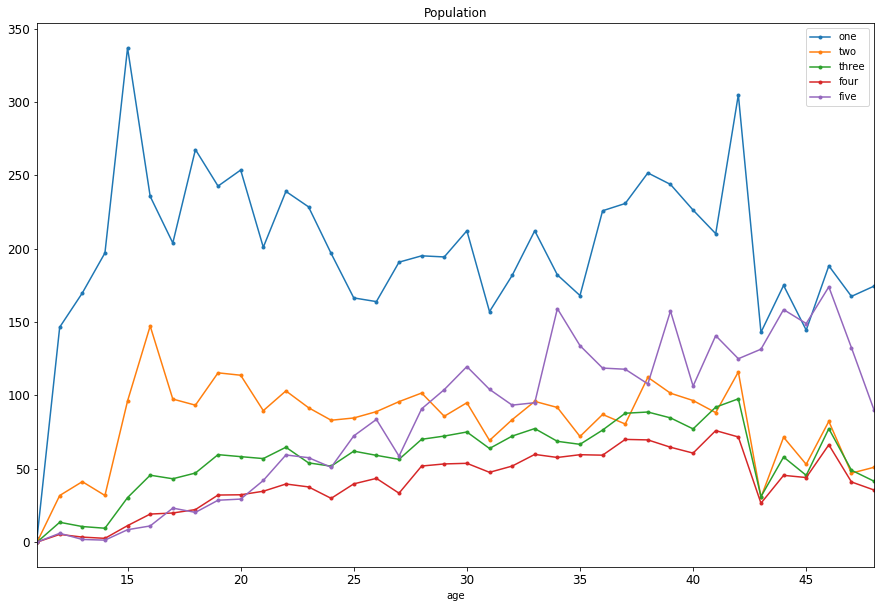

In [6]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population', style='.-', markevery=1, figsize=(15,10), fontsize=12)
plt.show()

In [9]:
df_per = df

In [10]:
df_per['sum'] = df_per.loc[:, 'one':'five'].sum(axis = 1)

In [11]:
df_per.loc[:, "one":"five"] = df_per.loc[:,"one":"five"].div(df_per["sum"], axis=0)

In [12]:
df_per = df_per.drop('sum', axis = 1)

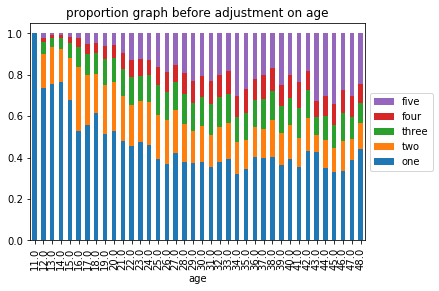

In [13]:
ax = df_per.groupby('age').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph before adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Without one-word utterances before adjusting ages

In [14]:
df_no1 = df.drop('one', axis = 1)

In [15]:
df_no1per = df_no1

In [16]:
df_no1per['sum'] = df_no1per.loc[:, 'two':'five'].sum(axis = 1)

In [18]:
df_no1per.loc[:, "two":"five"] = df_no1per.loc[:,"two":"five"].div(df_no1per["sum"], axis=0)

In [19]:
df_no1per = df_no1per.drop('sum', axis = 1)

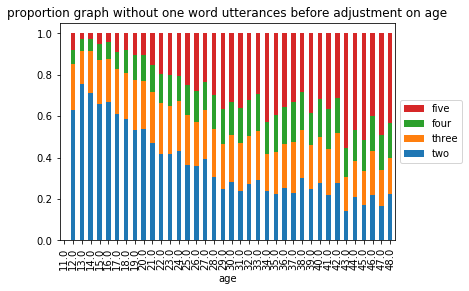

In [20]:
ax = df_no1per.groupby('age').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph without one word utterances before adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## With one-word utterances after adjusting ages

In [24]:
df_age1 = df.groupby('age').count()

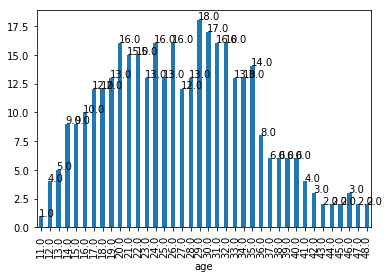

In [27]:
# Before coelescing ages
ax = df_age1['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [10]:
df_age = pd.read_excel('Providence.xlsx')

In [5]:
df_age2 = df_age.groupby('age.1').count()

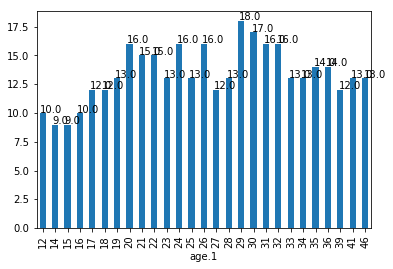

In [30]:
# After coelescing ages
ax = df_age2['fname'].plot(kind='bar') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [6]:
df_perage = df_age

In [36]:
df_perage = df_perage.drop('age', axis = 1)

In [37]:
df_perage['sum'] = df_perage.loc[:, 'one':'five'].sum(axis = 1)

In [38]:
df_perage.loc[:, 'one':'five'] = df_perage.loc[:, 'one':'five'].div(df_perage['sum'], axis = 0)
df_perage = df_perage.drop(['sum'], axis = 1)

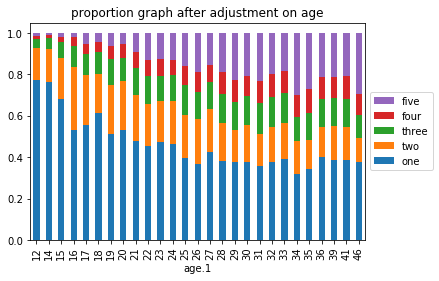

In [39]:
ax = df_perage.groupby('age.1').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph after adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Without one word utterances after adjusting ages

In [11]:
df_ageno1 = df_age.drop('one', axis = 1)

In [12]:
df_perageno1 = df_ageno1.drop('age', axis = 1)

In [13]:
df_perageno1['sum'] = df_perageno1.loc[:, 'two':'five'].sum(axis = 1)

In [14]:
df_perageno1.loc[:, 'two':'five'] = df_perageno1.loc[:, 'two':'five'].div(df_perageno1['sum'], axis = 0)
df_perageno1 = df_perageno1.drop(['sum'], axis = 1).dropna()

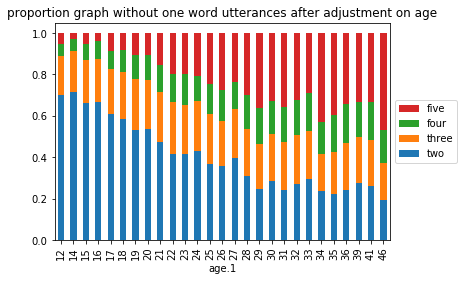

In [15]:
ax = df_perageno1.groupby('age.1').mean().plot.bar(stacked = True, legend = True, title = 'proportion graph without one word utterances after adjustment on age')
handles, labels= ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## plot per child

In [7]:
def per_child(df, name, group):
    ax = df.loc[df['corpus'] == name].groupby(group).mean().plot.bar(stacked = True, legend = True, title = name)
    handles, labels= ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### Without one-word utterances but with the adjustment on ages

In [16]:
df_perageno1['corpus'] = df_perageno1.fname.str[0:-10]

In [19]:
children = df_perageno1.corpus.unique()

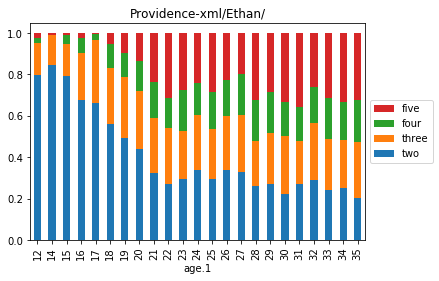

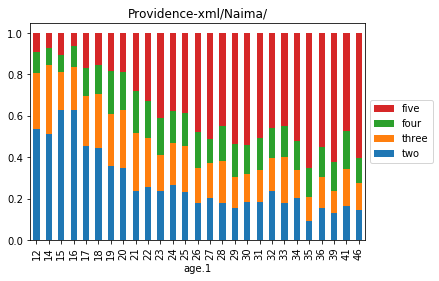

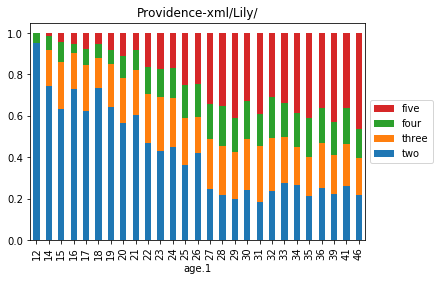

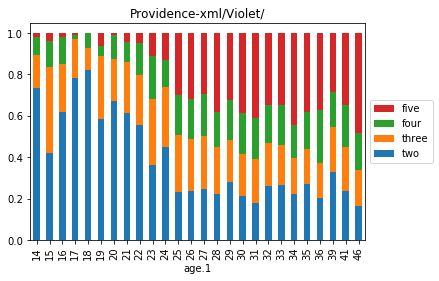

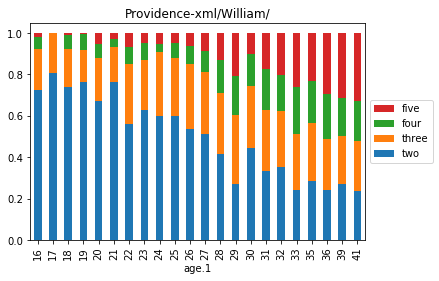

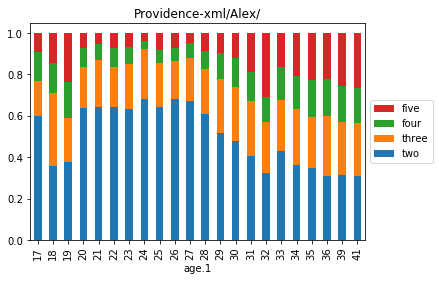

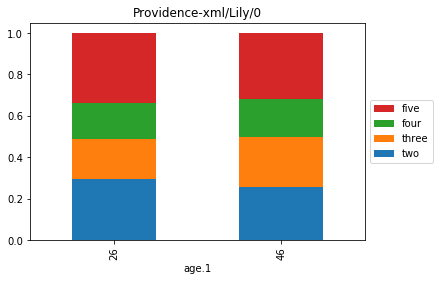

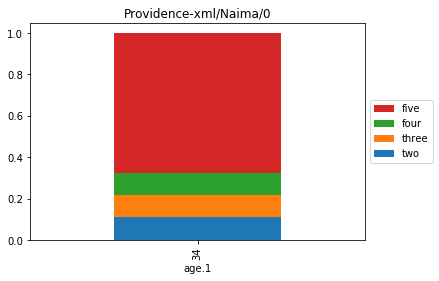

In [21]:
for child in children:   #  can't read Tai's data??
    per_child(df_perageno1, child, 'age.1')

# Analyze slope difference

## Overall slope difference(after adjusting ages)

In [22]:
df_mean = df_perageno1.groupby('age.1').mean()

In [23]:
slope.max_slope(df_mean)

{29}

In [24]:
for child in children:
    print(child, slope.max_slope_child(df_perageno1,child))    
    # can't calculate slope for last two children due to limited data

Providence-xml/Ethan/ {22}
Providence-xml/Naima/ {16}
Providence-xml/Lily/ {15}
Providence-xml/Violet/ {18}
Providence-xml/William/ {18}
Providence-xml/Alex/ {19}


ValueError: max() arg is an empty sequence